In [167]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import json

name = "Will_0_83"
window = (1, 3)
n_fft = 64
hop_length = 16

y, sr = librosa.load(f'data/recording_{name}.wav')
if window is not None:
    y = y[sr * window[0]:sr * window[1]]
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

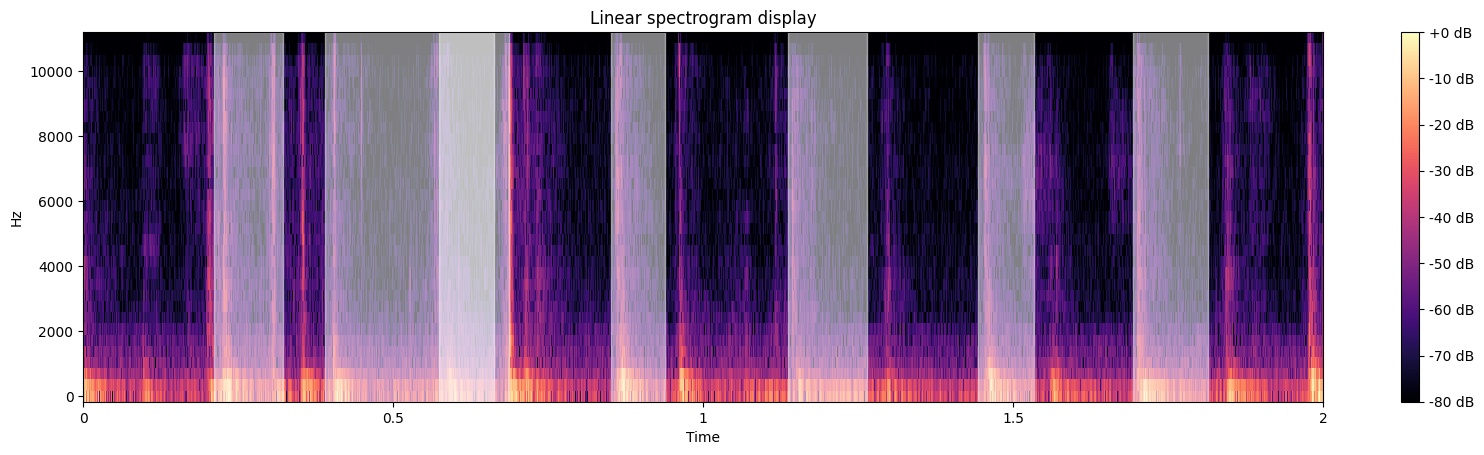

In [168]:
%matplotlib inline

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, y_axis='linear', x_axis='time', ax=ax, sr=sr, n_fft=n_fft, hop_length=hop_length)
ax.set(title='Linear spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")
fig.set_figwidth(20)

with open(f'data/events_{name}.json', 'r') as f:
    data = json.load(f)

events = data["events"]
abs_t = data["stream_start"]
event_pairs = []
keys_down = []
for e in events:
    if e[0] == "keydown":
        keys_down.append(e)
    elif e[0] == "keyup":
        key_down = next(k for k in keys_down if k[2] == e[2])
        event_pairs.append((key_down[1], e[1]))
        keys_down.remove(key_down)

for down, up in event_pairs:
    down -= abs_t
    up -= abs_t
    if window is None or (window[0] <= down and up <= window[1]):
        if window is not None:
            down -= window[0]
            up -= window[0]
        ax.axvspan(down, up, alpha=0.5, color='white')

plt.interactive(True)
plt.show()

In [169]:
import json

